In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
h_data = pd.read_csv("C:\\Users\\Hp\\Desktop\\Nikhat\\datasets\\heart.csv")

In [4]:
h_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
h_data['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [6]:
h_data['age'].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

In [7]:
h_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [8]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [9]:
h_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E9D69B470>,
      dtype=object)

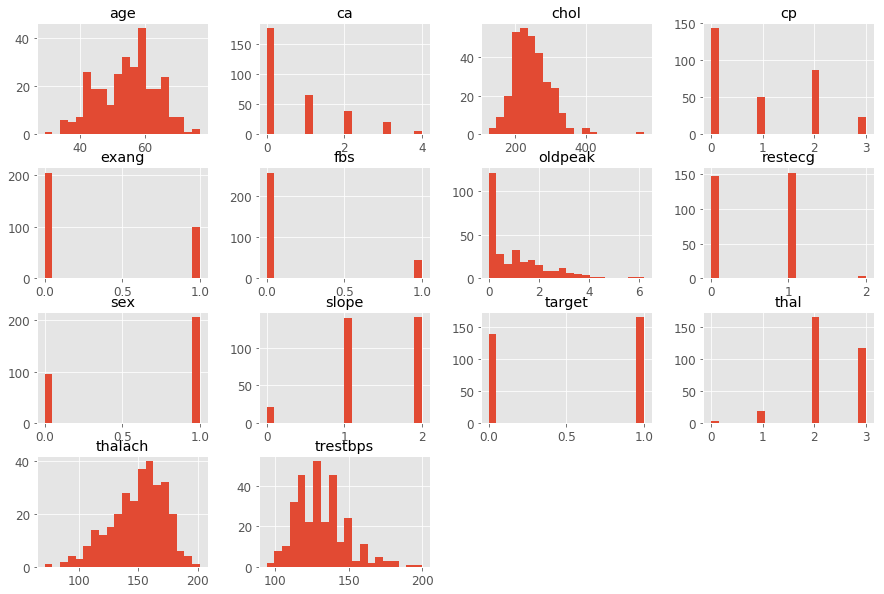

In [10]:
h_data.hist(bins= 20, figsize=(15,10))

In [11]:
corr_matrix = h_data.corr()
corr_matrix["target"].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

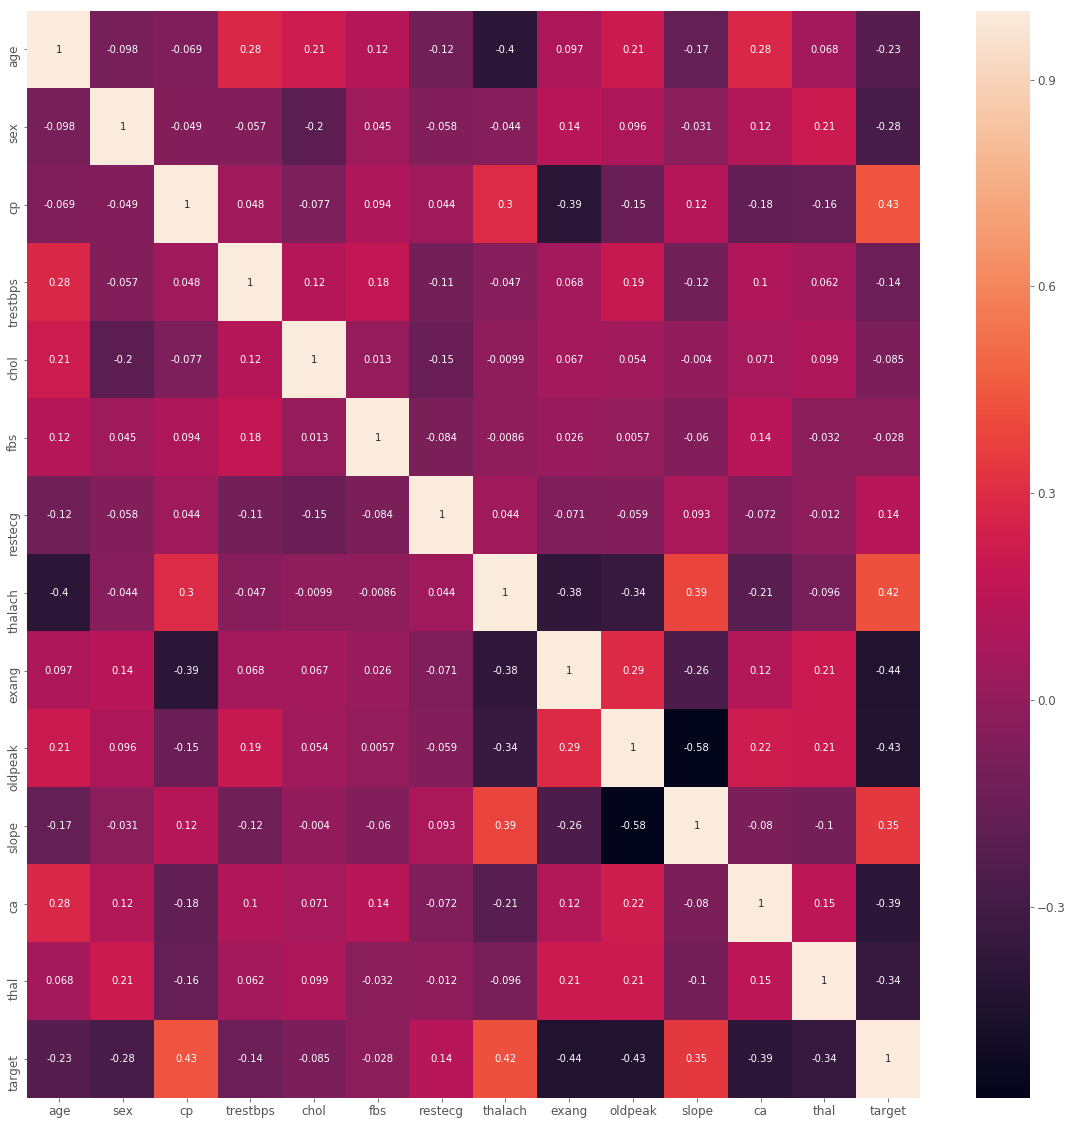

In [12]:
plt.figure(figsize= (20, 20))
sns.heatmap(h_data.corr(), annot = True )

In [13]:
X = h_data.iloc[:, :13].values
y = h_data.iloc[:, 13].astype(np.int)

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test=train_test_split(X,y, test_size=0.3,random_state=42)

In [49]:
X_train.shape

(212, 13)

In [50]:
y_train.shape

(212,)

In [51]:
X_test.shape

(91, 13)

In [52]:
y_test.shape

(91,)

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [54]:
num_cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("cat_encoder", OneHotEncoder())
])                                  # which all funcions are needed can be described in this function

In [55]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ('std_scalar' , StandardScaler())
]) 

In [56]:
from  sklearn.compose import ColumnTransformer
num_cat_attribs=[1,2,5,6,8,10,11,12]
num_attribs=[0,3,4,7,9]

full_pipeline=ColumnTransformer([
                ("num_cat", num_cat_pipeline,num_cat_attribs),#num_pipeline is added to all attributes
                 ("num",num_pipeline,num_attribs)
            ])

In [57]:
X_train_prep = full_pipeline.fit_transform(X_train)

X_train_prep.shape

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(212, 30)

In [58]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf= RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rnd_clf.fit(X_train_prep, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [59]:
y_rnd_pred= rnd_clf.predict(X_train_prep)

In [60]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score, f1_score

print("Accuracy after CV :", accuracy_score(y_train, y_rnd_pred))
print("Pricision after CV:", precision_score(y_train, y_rnd_pred))
print("Recall after CV   :", recall_score(y_train, y_rnd_pred))
print("f1_score after CV :", f1_score(y_train, y_rnd_pred))

Accuracy after CV : 0.9198113207547169
Pricision after CV: 0.9083333333333333
Recall after CV   : 0.9478260869565217
f1_score after CV : 0.9276595744680851


### TEST

In [61]:
X_test_prep= full_pipeline.fit_transform(X_test)
X_test_prep.shape

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(91, 30)

In [63]:
y_test_rnd_pred= rnd_clf.predict(X_test_prep)  # test should not train again

In [64]:
print("Accuracy after CV :", accuracy_score(y_test, y_test_rnd_pred))
print("Pricision after CV:", precision_score(y_test, y_test_rnd_pred))
print("Recall after CV   :", recall_score(y_test, y_test_rnd_pred))
print("f1_score after CV :", f1_score(y_test, y_test_rnd_pred))

Accuracy after CV : 0.8351648351648352
Pricision after CV: 0.8431372549019608
Recall after CV   : 0.86
f1_score after CV : 0.8514851485148515


## KNN 

### Train

In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train_prep, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [68]:
y_knn_pred= knn_clf.predict(X_train_prep)

In [69]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score, f1_score

print("Accuracy after CV :", accuracy_score(y_train, y_knn_pred))
print("Pricision after CV:", precision_score(y_train, y_knn_pred))
print("Recall after CV   :", recall_score(y_train, y_knn_pred))
print("f1_score after CV :", f1_score(y_train, y_knn_pred))

Accuracy after CV : 0.9009433962264151
Pricision after CV: 0.9051724137931034
Recall after CV   : 0.9130434782608695
f1_score after CV : 0.9090909090909092


### test

In [70]:
X_test_prep= full_pipeline.fit_transform(X_test)
X_test_prep.shape

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(91, 30)

In [76]:
y_test_knn_pred= knn_clf.predict(X_test_prep) 

In [77]:
print("Accuracy after CV :", accuracy_score(y_test, y_test_knn_pred))
print("Pricision after CV:", precision_score(y_test, y_test_knn_pred))
print("Recall after CV   :", recall_score(y_test, y_test_knn_pred))
print("f1_score after CV :", f1_score(y_test, y_test_knn_pred))

Accuracy after CV : 0.8021978021978022
Pricision after CV: 0.8478260869565217
Recall after CV   : 0.78
f1_score after CV : 0.8125
